In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("train.csv")

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(close=None, block=None)>

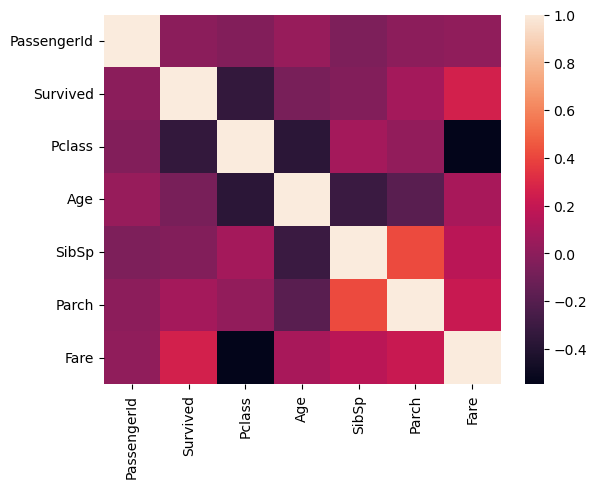

In [20]:
import seaborn as sns
sns.heatmap(data.corr(),cmap="rocket")
plt.show

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(data, data[["Survived","Pclass", "Sex"]]):
    strat_train_set= data.loc[train_indices]
    strat_test_set= data.loc[test_indices]

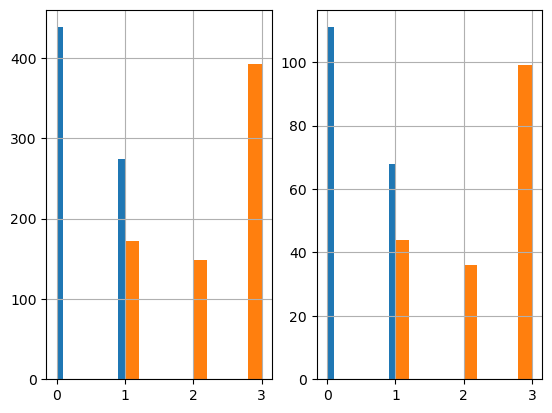

In [22]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [44]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 538 to 845
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          568 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [24]:
!pip install -U scikit-learn

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer= SimpleImputer(strategy="mean")
        X['Age']=imputer.fit_transform(X[['Age']])
        return X



In [72]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder= OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names= ["C", "S", "Q","N"]
        
        for i in range (len(matrix.T)):
            X[column_names[i]]= matrix.T[i]
    
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names= ["Female", "Male"]


        for i in range (len(matrix.T)):
            X[column_names[i]]= matrix.T[i]
        return X

In [96]:
class FeatureDropper(BaseEstimator, TransformerMixin):
      def fit(self, X, y=None):
        return self
      def transform(self, X):
        return X.drop(["Embarked", "Ticket", "Name", "Sex", "Cabin", "N"], axis=1, errors= "ignore")


In [97]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [98]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [99]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
538,539,0,3,29.526708,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
29,30,0,3,29.526708,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
576,577,1,2,34.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
102,103,0,1,21.000000,0,1,77.2875,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
273,274,0,1,37.000000,0,1,29.7000,1.0,0.0,0.0,0.0,1.0
323,324,1,2,22.000000,1,1,29.0000,0.0,0.0,1.0,1.0,0.0
352,353,0,3,15.000000,1,1,7.2292,1.0,0.0,0.0,0.0,1.0
423,424,0,3,28.000000,1,1,14.4000,0.0,0.0,1.0,1.0,0.0


In [106]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']
scaler= StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_gird = [
    {"n_estimators": [10,100,200,500], "max_depth": [None,5,10], "min_samples_split":[2,3,4]}
]
grid_search= GridSearchCV(clf,param_gird, cv=3, scoring= "accuracy",return_train_score= True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [116]:
final_clf= grid_search.best_estimator_

In [117]:
strat_test_set= pipeline.fit_transform(strat_test_set)

In [118]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
152,153,0,3,55.500000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
237,238,1,2,8.000000,0,2,26.2500,0.0,0.0,1.0,1.0,0.0
863,864,0,3,30.369863,8,2,69.5500,0.0,0.0,1.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
548,549,0,3,33.000000,1,1,20.5250,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0,3,21.000000,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
30,31,0,1,40.000000,0,0,27.7208,1.0,0.0,0.0,0.0,1.0
588,589,0,3,22.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
259,260,1,2,50.000000,0,1,26.0000,0.0,0.0,1.0,1.0,0.0


In [126]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test = strat_test_set['Survived']
scaler= StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()


In [129]:
final_clf.score(X_data_test, y_data_test)

0.770949720670391

In [130]:
final_data= pipeline.fit_transform(data)

In [131]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [134]:
X_final=strat_test_set.drop(['Survived'],axis=1)
y_final = strat_test_set['Survived']
scaler= StandardScaler()
X_data_final= scaler.fit_transform(X_final)
y_data_final= y_final.to_numpy()


In [135]:
prodiction_clf = RandomForestClassifier()
param_gird = [
    {"n_estimators": [10,100,200,500], "max_depth": [None,5,10], "min_samples_split":[2,3,4]}
]
grid_search= GridSearchCV(prodiction_clf,param_gird, cv=3, scoring= "accuracy",return_train_score= True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [137]:
prodiction_final_clf= grid_search.best_estimator_


In [143]:
titanic_test_data= pd.read_csv("test.csv")

In [144]:
final_test_data= pipeline.fit_transform(titanic_test_data)

In [146]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  C            418 non-null    float64
 12  S            418 non-null    float64
 13  Q            418 non-null    float64
 14  Female       418 non-null    float64
 15  Male         418 non-null    float64
dtypes: float64(7), int64(4), object(5)
memory usage: 52.4+ KB


In [147]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method="ffill")
scaler= StandardScaler()
X_data_final_test= scaler.fit_transform(X_final_test)


In [149]:
predictions= prodiction_final_clf.predict(X_data_final_test)

In [155]:
final_df= pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']= predictions
final_df.to_csv("Sonuç.csv", index=False)